# 1. Module Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

# 2. Dataset

In [8]:
digits = load_digits()

# 3. Feature, Label, Target Names, Description

In [9]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
# 이미지 개수 및 pixel
digits_data = digits.data
digits_data.shape

(1797, 64)

In [14]:
print(digits.feature_names)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [43]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

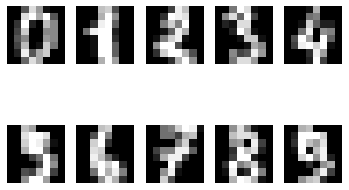

In [19]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off') 
plt.show()

In [30]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:50]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [32]:
new_label = [1 if i == 1 else 0 for i in digits_label ] 
print(new_label[:50])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


# 4. Train/Test Set

# 5. 다양한 모델로 학습

## 1. Decision Tree

In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train) # 의사결정나무 모델로 학습
y_pred = decision_tree.predict(X_test) # 테스트 결과 예측

accuracy = accuracy_score(y_test, y_pred) # y_pred(답안지)를 y_test(정답지)로 채점
accuracy

0.9666666666666667

## 2. Random Forest

In [38]:
# Random Forest
random_forest = RandomForestClassifier(random_state=15) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

accuracy = accuracy_score(y_test, y_pred) # y_pred(답안지)를 y_test(정답지)로 채점
accuracy

0.9888888888888889

## 3. SVM

In [39]:
# SVM
svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9944444444444445

## 4. SGD Classifier

In [40]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9694444444444444

## 5. Logistic Regression

In [41]:
# Logistic Regression
logistic_model = LogisticRegression() # 모델 객체 생성
logistic_model.fit(X_train, y_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred = logistic_model.predict(X_test) # 예측

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

# Conclusion

### Questions

1. 데이터셋 구성 파악 -> feeature 과 label

2. 5가지 모델 이용하여 결과값 얻기 -> 모델학습 및 테스트 정상적으로 수행

3. 모델의 평가지표 선택, 근거를 서술 -> 결과물을 바탕으로 선택하고 그에 따른 의견 서술

### Answers

1. Feature 및 Label 표현 완료

2. 5가지 모델을 이용하여 테스트 및 값 출력 완료

3. 모델을 비교하였을때
- Decision Tree : 96.777
- Random Forest : 98.999
- SVM : 99.444
- SGD Classifier : 96.944 
- Logistic Regression : 97.222

= 각 모델들을 비교했을때 SVM이 가장 높은 적정률을 보였다.
추측컨데 이 문제에선 초평면을 이용하여 2개의 클래스로만 분류하기에 SVM이 가장 높은 효율을 보여진다.